In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv(r"Sales Data.csv")


# Display the first few rows and summary statistics
print(df.head(5))
print(df.info())
print(df.describe())

   Sr. No.  Order ID               Product  Quantity Ordered  Price Each  \
0        0    295665    Macbook Pro Laptop                 1     1700.00   
1        1    295666    LG Washing Machine                 1      600.00   
2        2    295667  USB-C Charging Cable                 1       11.95   
3        3    295668      27in FHD Monitor                 1      149.99   
4        4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0  30-12-2019 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  29-12-2019 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12-12-2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  22-12-2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  18-12-2019 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  
0   New York City     0  
1   New York Cit

In [91]:
import pandas as pd

# Assuming you already have a DataFrame 'df'

# Handle missing values
print(df.isnull().sum())
# There are no missing values

# Convert 'Order Date' to datetime with explicit format
# Example format: day-month-year hour:minute (e.g., '25-12-2023 14:30')
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)  # Set dayfirst=True if format is DD-MM-YYYY

print("\nUpdated Dataset Info After Converting 'Order Date':")
print(df.info())

# Create any new columns needed for analysis
df['Mobile No.'] = ['5648456'] * len(df)
print("\nUpdated Dataset Info After Adding 'Mobile No.':")
print(df.info())

Sr. No.             0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Mobile No.          0
dtype: int64

Updated Dataset Info After Converting 'Order Date':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sr. No.           185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sale

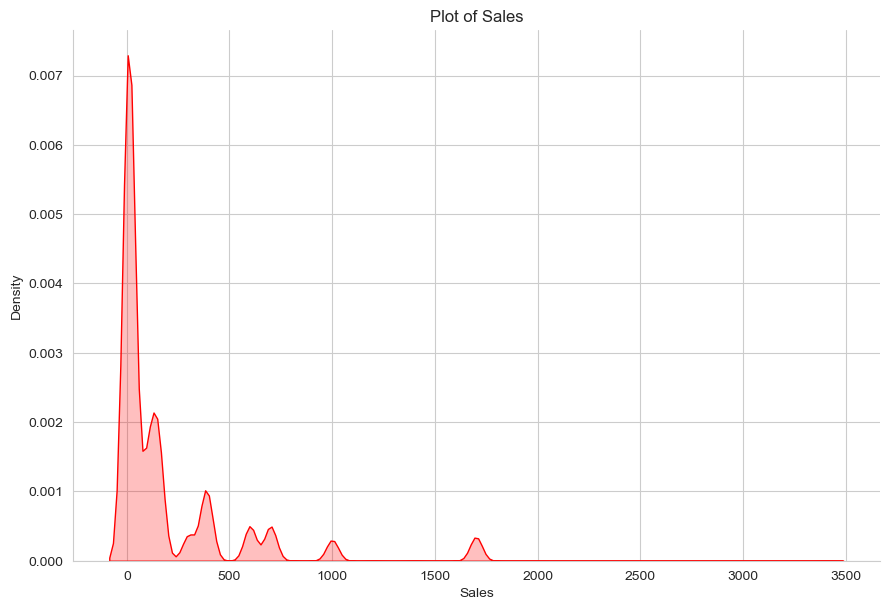

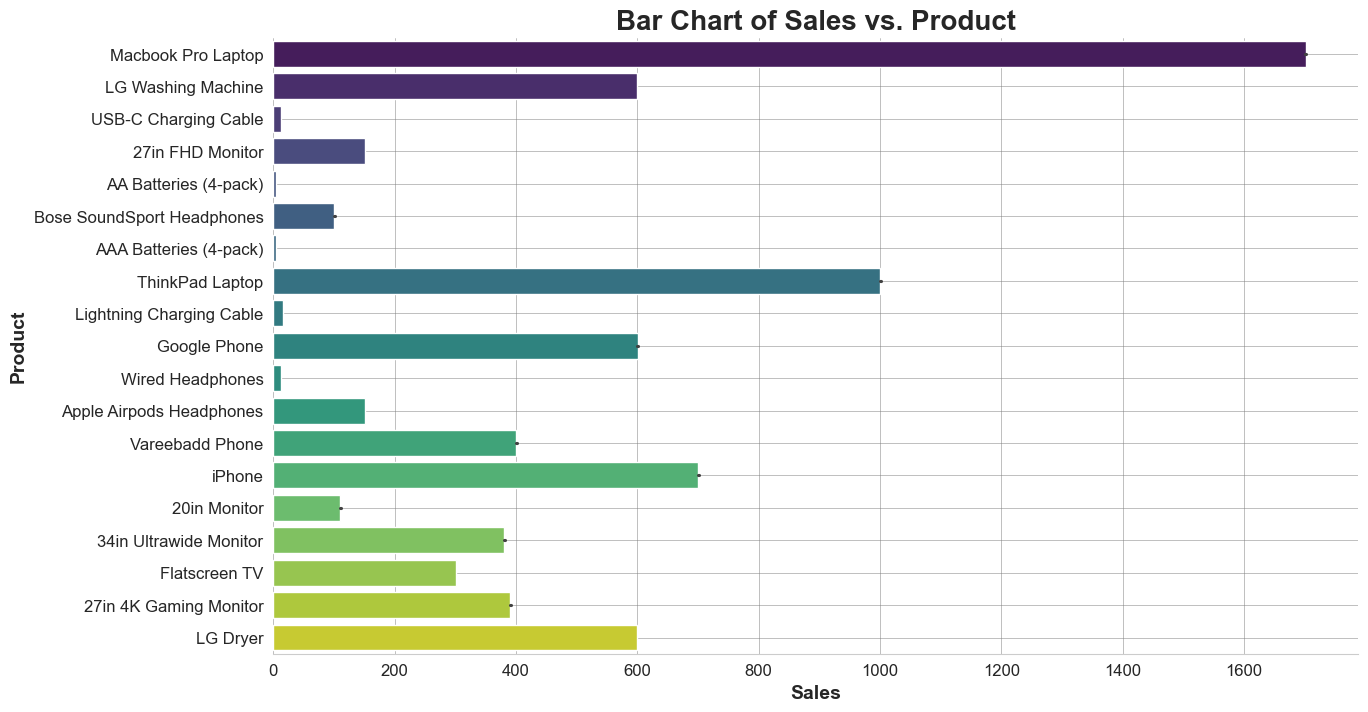

In [103]:
# Univariate Analysis: Plot for Sales
plot = sns.displot(
    data=df,
    x="Sales",
    kind="kde",
    height=6,
    aspect=1.5,
    color="red",
    fill=True
)
plot.set(title="Plot of Sales", xlabel="Sales", ylabel="Density")
plt.show()


# Bivariate Analysis: Bar Chart of Sales vs. Product
sns.set_style("whitegrid")

# Automatically generating a new palette with enough colors (using "viridis" palette)
palette = sns.color_palette("viridis", n_colors=df['Product'].nunique())

# Change figure size for a larger or smaller plot
plt.figure(figsize=(14, 8))  # New size: wider and taller plot
barplot = sns.barplot(data=df, x="Sales", y="Product", palette=palette, hue="Product")  # Add hue='Product'
barplot.set_title("Bar Chart of Sales vs. Product", fontsize=20, weight='bold')
barplot.set_xlabel("Sales", fontsize=14, weight='bold')
barplot.set_ylabel("Product", fontsize=14, weight='bold')

# Customize spines and grid for better appearance
barplot.spines['top'].set_visible(False)
barplot.spines['right'].set_visible(False)
barplot.spines['left'].set_visible(False)
barplot.spines['bottom'].set_visible(True)
barplot.xaxis.set_ticks_position('none')
barplot.yaxis.set_ticks_position('none')
barplot.xaxis.set_tick_params(labelsize=12)
barplot.yaxis.set_tick_params(labelsize=12)
barplot.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()

In [105]:

# Summary statistics for key variables
# Summary statistics for selected key variables
key_variables = ['Sales', 'Quantity Ordered', 'City']  # Specify key variables
summary_stats_key = df[key_variables].describe(include='all')

print("Summary Statistics for Key Variables:")
print(summary_stats_key)

# Grouped statistics by 'City' for 'Sales' and 'Quantity Ordered'
grouped_stats_key = df.groupby('City').agg({
    'Sales': ['mean', 'std', 'min', 'max'],         # Aggregation functions for 'Sales'
    'Quantity Ordered': ['mean', 'std', 'min', 'max']  # Aggregation functions for 'Quantity Ordered'
})

print("\nGrouped Statistics by City:")
print(grouped_stats_key)


Summary Statistics for Key Variables:
                Sales  Quantity Ordered            City
count   185950.000000     185950.000000          185950
unique            NaN               NaN               9
top               NaN               NaN   San Francisco
freq              NaN               NaN           44732
mean       185.490917          1.124383             NaN
std        332.919771          0.442793             NaN
min          2.990000          1.000000             NaN
25%         11.950000          1.000000             NaN
50%         14.950000          1.000000             NaN
75%        150.000000          1.000000             NaN
max       3400.000000          9.000000             NaN

Grouped Statistics by City:
                    Sales                           Quantity Ordered  \
                     mean         std   min     max             mean   
City                                                                   
Atlanta        187.856903  334.718438  2.99  


### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [107]:
from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions
import numpy as np
import pandas as pd

# Sample sales data for two cities
city_a_sales = [1700, 600, 11.95, 3.84]
city_b_sales = [23.9, 99.99, 11.96]

# Perform independent t-test
t_statistic, p_value = ttest_ind(city_a_sales, city_b_sales)

# Print the T-test result in the required format
print(f"T-test: t-statistic = {t_statistic}, p-value = {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Significant difference in sales between cities")
else:
    print("No significant difference in sales between cities")



# Example: Chi-square test for independence between Product and City

# Load your sales data from a CSV or Excel file
df = pd.read_csv('Sales Data.csv')  

# Display the first few rows of data (optional, for verification)
# Check the column names to identify the relevant columns
print(df.head())
print(df.columns)

# Create the contingency table between 'Product' and 'City'
contingency_table = pd.crosstab(df['Product'], df['City'])

# Perform Chi-square test for independence
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

# Print the Chi-square test result in the required format
print(f"Chi-square test: chi2 = {chi2_stat}, p-value = {p_value_chi2}, dof = {dof}")

T-test: t-statistic = 1.129338140761255, p-value = 0.3100051211739053
No significant difference in sales between cities
   Sr. No.  Order ID               Product  Quantity Ordered  Price Each  \
0        0    295665    Macbook Pro Laptop                 1     1700.00   
1        1    295666    LG Washing Machine                 1      600.00   
2        2    295667  USB-C Charging Cable                 1       11.95   
3        3    295668      27in FHD Monitor                 1      149.99   
4        4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0  30-12-2019 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  29-12-2019 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12-12-2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  22-12-2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  18-12-2019 12:38         

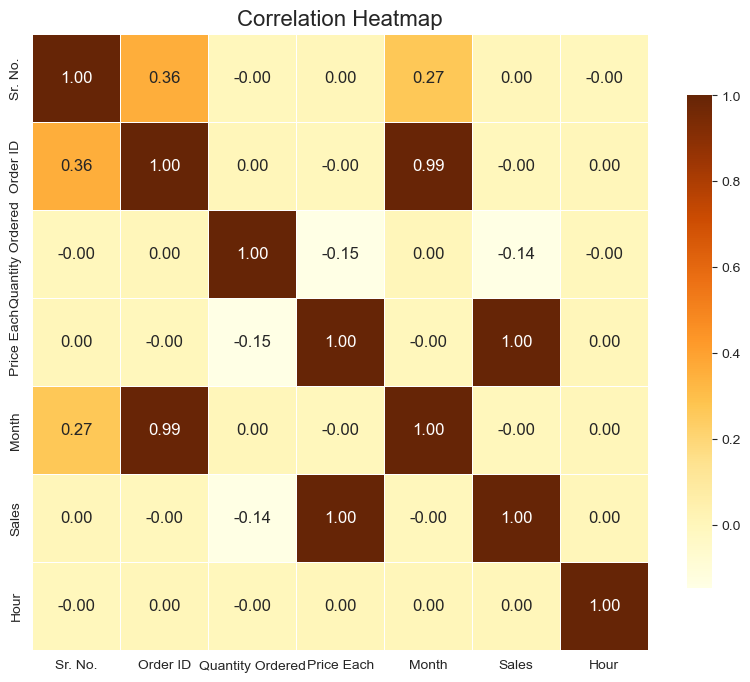

In [135]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Sales Data.csv')

# Select Numeric Columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap with adjusted font size for annotations and light color palette
plt.figure(figsize=(10, 8))  

# Plot heatmap with adjusted font size for annotations
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr", fmt=".2f", annot_kws={"size": 12}, square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})

# Title and display the heatmap
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

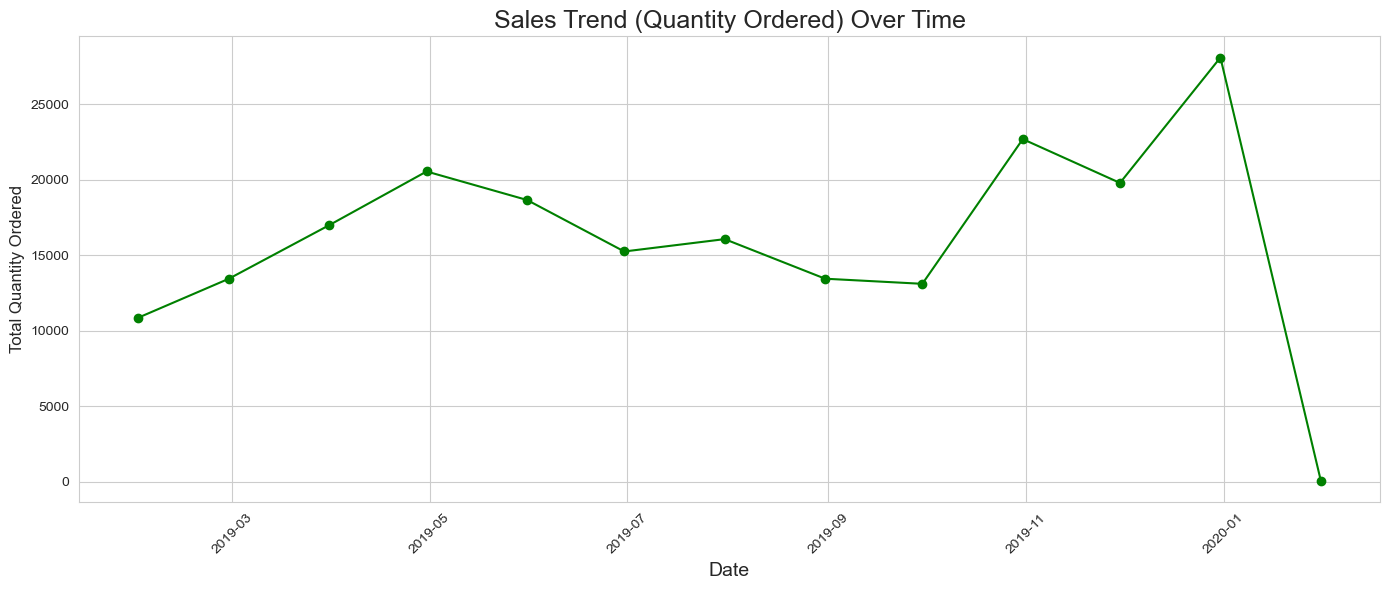

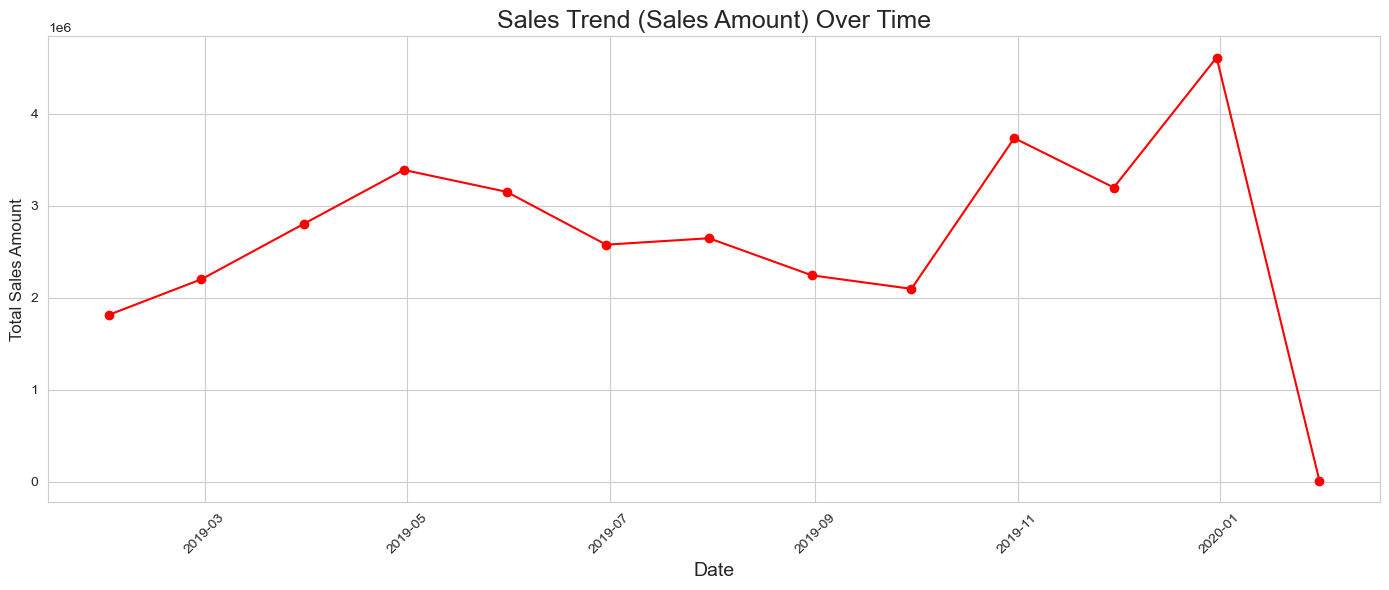

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Sales Data.csv')

# Convert 'Order Date' to datetime with correct format (day-first)
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Resample sales data by month (using 'ME' for month-end)
# Aggregate sales by month for 'Quantity Ordered'
sales_trend_quantity = data.resample('ME', on='Order Date')['Quantity Ordered'].sum()

# Aggregate sales by month for 'Sales'
sales_trend_sales = data.resample('ME', on='Order Date')['Sales'].sum()

# Plotting Sales Trend for Quantity Ordered
plt.figure(figsize=(14, 6))
plt.plot(sales_trend_quantity.index, sales_trend_quantity, marker='o', linestyle='-', color='green')
plt.title('Sales Trend (Quantity Ordered) Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Quantity Ordered', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Sales Trend for Sales Amount
plt.figure(figsize=(14, 6))
plt.plot(sales_trend_sales.index, sales_trend_sales, marker='o', linestyle='-', color='red')
plt.title('Sales Trend (Sales Amount) Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

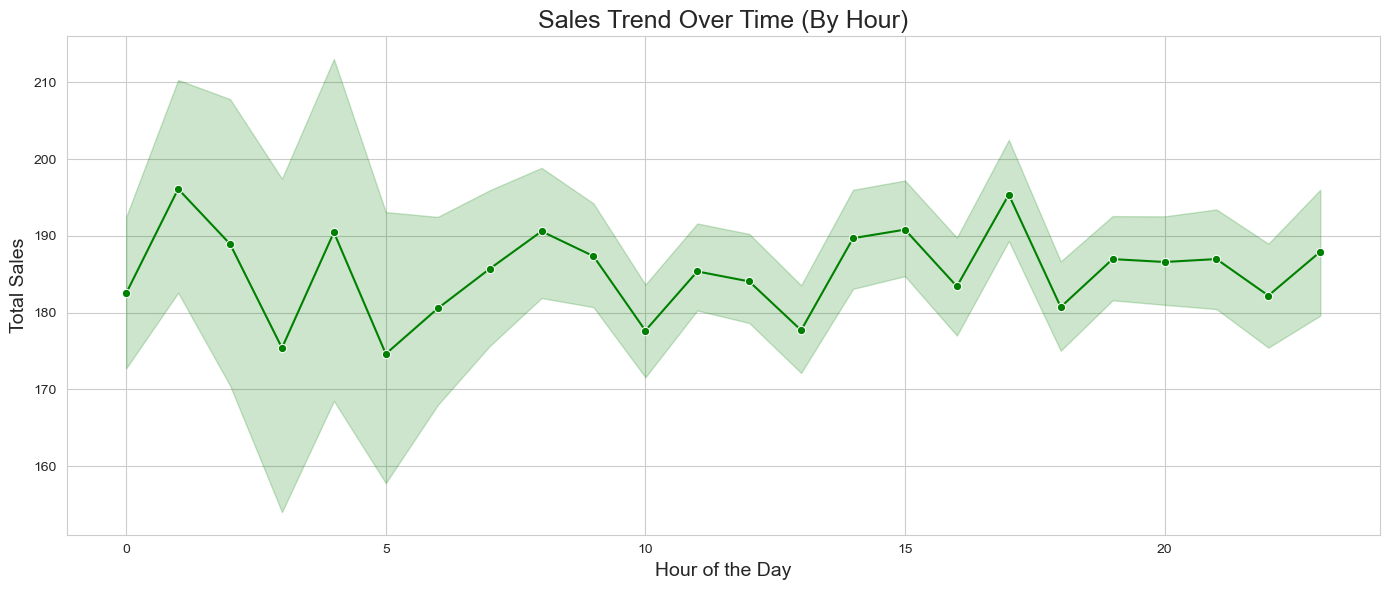

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Sales Data.csv')

# Ensure 'Hour' and 'Sales' columns exist and are numeric
# If 'Hour' is not already numeric, you might need to convert it

# Plotting sales trend over hours of the day
plt.figure(figsize=(14, 6))
sns.lineplot(x=data["Hour"], y=data["Sales"], data=data, marker='o', color='green')

# Customize the appearance
plt.xlabel('Hour of the Day', fontsize=14)  # Set x-axis label
plt.ylabel('Total Sales', fontsize=14)      # Set y-axis label
plt.title('Sales Trend Over Time (By Hour)', fontsize=18)  # Set plot title
plt.grid(True)  # Add gridlines to the plot

# Show the plot
plt.tight_layout()  # Adjust layout to ensure no clipping of labels
plt.show()


In [79]:

# Identifying top-performing product categories based on total sales and profit

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your sales data from a CSV or Excel file
data = pd.read_csv('Sales Data.csv')  # Replace with your file path

# Check the first few rows to inspect the data
print(data.head())

# Check the column names to ensure the relevant columns exist
print(data.columns)

# Since 'Profit' column doesn't exist, let's use 'Sales' instead for performance
# Group data by 'Product' and calculate total Sales
product_performance = data.groupby('Product')[['Sales']].sum().reset_index()

# Sort the products by total Sales in descending order
product_performance_sorted = product_performance.sort_values(by='Sales', ascending=False)

# Display the top-performing products based on Sales
print(product_performance_sorted.head())

# Plotting total sales by product category

sns.barplot(data, x="Sales", y="Product")




   Sr. No.  Order ID               Product  Quantity Ordered  Price Each  \
0        0    295665    Macbook Pro Laptop                 1     1700.00   
1        1    295666    LG Washing Machine                 1      600.00   
2        2    295667  USB-C Charging Cable                 1       11.95   
3        3    295668      27in FHD Monitor                 1      149.99   
4        4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0  30-12-2019 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  29-12-2019 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12-12-2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  22-12-2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  18-12-2019 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  
0   New York City     0  
1   New York Cit

<Axes: xlabel='Sales', ylabel='Product'>

In [154]:
# Generating summary statistics for each region
# Generating summary statistics for each region
summary_stats = data.groupby('City')['Sales'].agg(
    total_sales='sum',
    average_sales='mean',
    transaction_count='count'
).reset_index()

# Display the summary statistics
print(summary_stats)


             City  total_sales  average_sales  transaction_count
0         Atlanta   2795498.58     187.856903              14881
1          Austin   1819581.75     183.703357               9905
2          Boston   3661642.01     183.688272              19934
3          Dallas   2767975.40     186.772969              14820
4     Los Angeles   5452570.80     184.177362              29605
5   New York City   4664317.43     187.502711              24876
6        Portland   2320490.61     186.160498              12465
7   San Francisco   8262203.91     184.704550              44732
8         Seattle   2747755.48     186.516120              14732


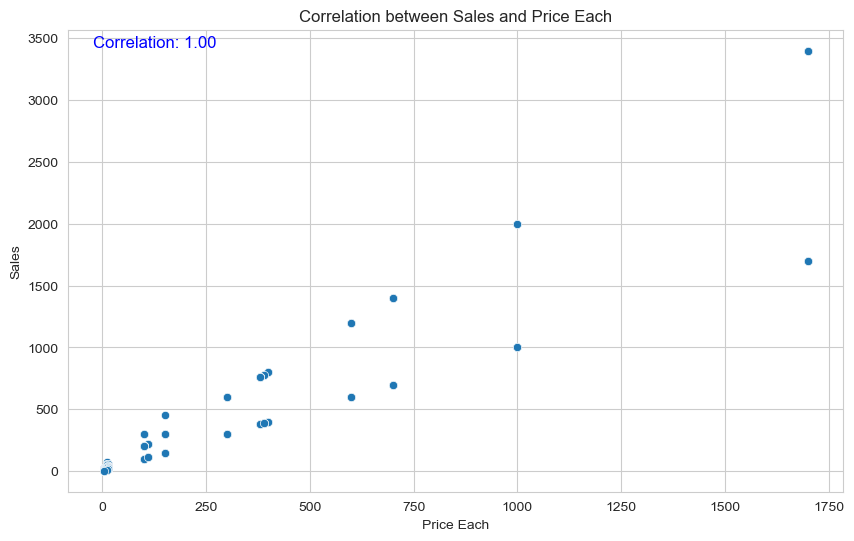

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame loaded from the CSV

# data = pd.read_csv('Sales Data.csv')

# Visualizing the correlation between sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Sales', data=data)

# Add labels and title
plt.title('Correlation between Sales and Price Each')
plt.xlabel('Price Each')
plt.ylabel('Sales')

# Displaying the correlation coefficient (optional)
correlation = data['Price Each'].corr(data['Sales'])
plt.figtext(0.15, 0.85, f'Correlation: {correlation:.2f}', fontsize=12, color='blue')

# Show the plot
plt.show()

0   2019-12-30 00:01:00
1   2019-12-29 07:03:00
2   2019-12-12 18:21:00
3   2019-12-22 15:13:00
4   2019-12-18 12:38:00
Name: Order Date, dtype: datetime64[ns]


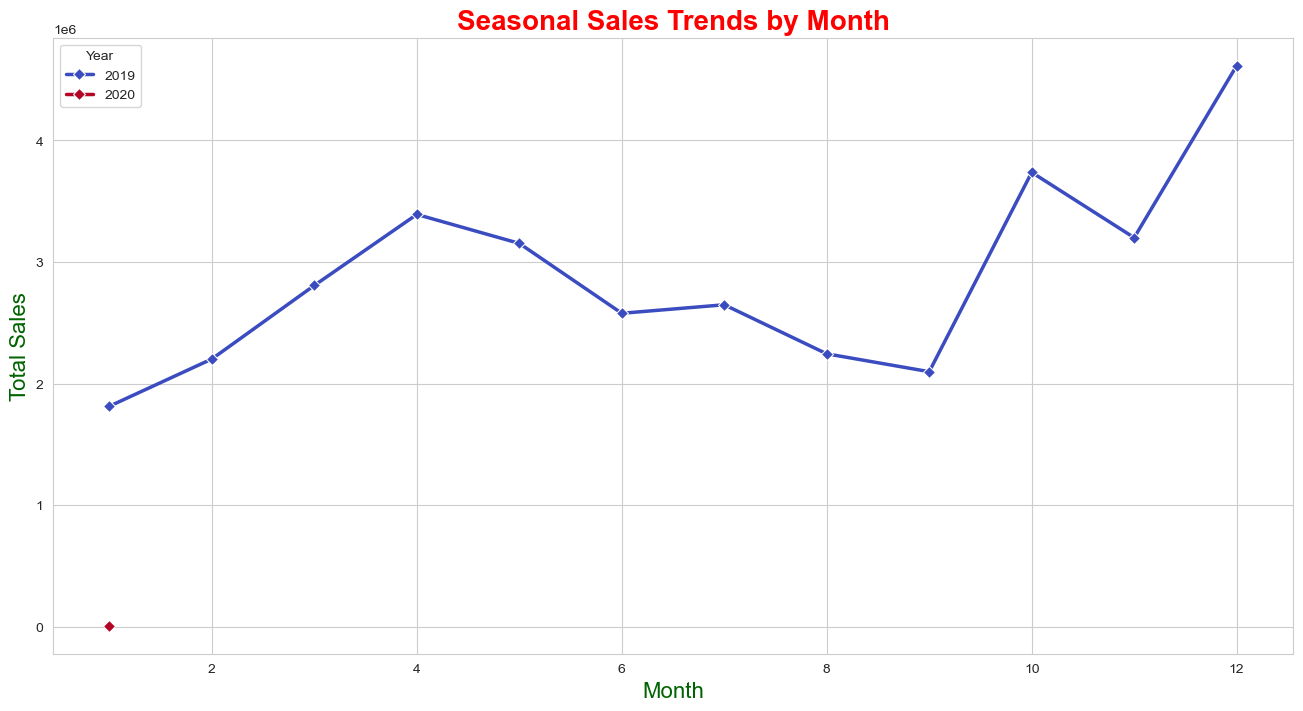

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Sales Data.csv')

# Plotting seasonal sales trends
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y %H:%M', errors='coerce') 

# Check if 'Order Date' is converted correctly
print(data['Order Date'].head())  

# Extract Year and Month from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Grouping sales data by Year and Month, summing Sales
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting seasonal sales trends by Month
plt.figure(figsize=(16, 8))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales, marker='D', palette='coolwarm', linewidth=2.5)
plt.title('Seasonal Sales Trends by Month', fontsize=20, weight='bold', color='Red')
plt.xlabel('Month', fontsize=16, color='darkgreen')
plt.ylabel('Total Sales', fontsize=16, color='darkgreen')

# Display the plot
plt.show()

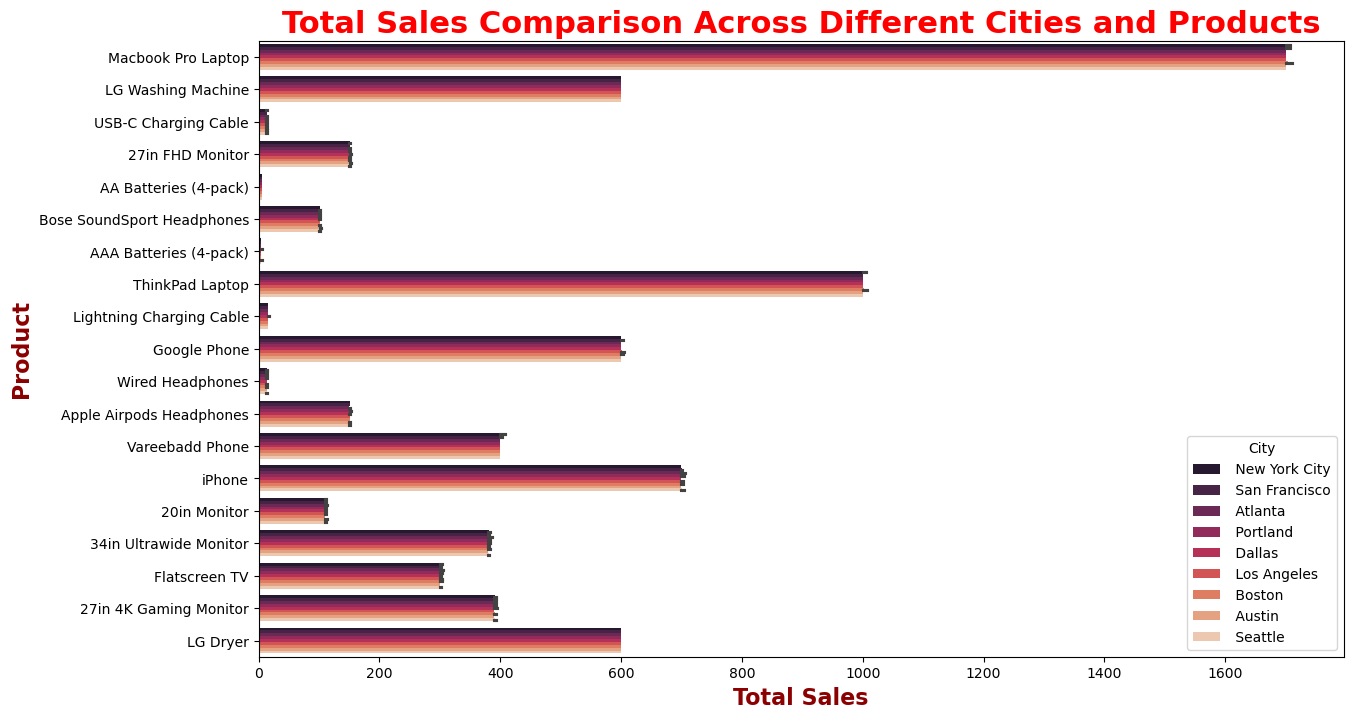

In [26]:

# Comparing sales across different ship modes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Sales Data.csv')

# Comparing sales across different ship modes
plt.figure(figsize=(14, 8)) 
sns.barplot(x='Sales', y='Product', hue='City', data=data, palette='rocket') 

# Add labels and title
plt.title('Total Sales Comparison Across Different Cities and Products', fontsize=22, weight='bold', color='red')
plt.xlabel('Total Sales', fontsize=16, weight='bold', color='darkred')
plt.ylabel('Product', fontsize=16, weight='bold', color='darkred')

# Show the plot
plt.show()


   sr._no.  order_id               product  quantity_ordered  price_each  \
0        0    295665    Macbook Pro Laptop                 1     1700.00   
1        1    295666    LG Washing Machine                 1      600.00   
2        2    295667  USB-C Charging Cable                 1       11.95   
3        3    295668      27in FHD Monitor                 1      149.99   
4        4    295669  USB-C Charging Cable                 1       11.95   

         order_date                        purchase_address  month    sales  \
0  30-12-2019 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  29-12-2019 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12-12-2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  22-12-2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  18-12-2019 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

             city  hour  
0   New York City     0  
1   New York Cit

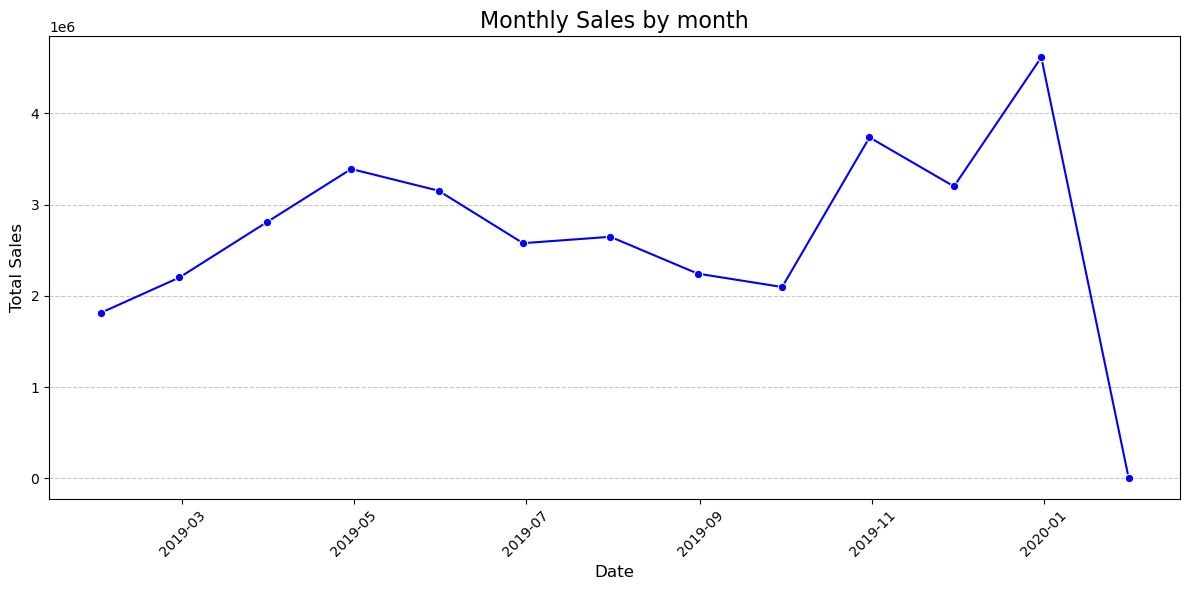

In [38]:
import pandas as pd

# Load the dataset
file_path = "Sales Data.csv"  # Adjust this path if necessary
df = pd.read_csv(file_path)

# Ensure column names are clean
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns = df.columns.str.lower()  # Convert to lowercase

# Print the first few rows of the dataframe to verify
print(df.head())

# Print column names to verify the transformation
print("Column names:", df.columns)

# Check if 'order_date' exists in the dataset
if 'order_date' in df.columns:
    # Ensure 'order_date' column is of datetime type, assuming day-first format
    df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y %H:%M', errors='coerce', dayfirst=True)
    
    # Print the datatype of 'order_date'
    print("Data type of 'order_date':", df['order_date'].dtype)
    
    # Dropping rows where 'order_date' couldn't be converted
    df = df.dropna(subset=['order_date'])
    print("Missing values after dropping invalid 'order_date' rows:\n", df.isnull().sum())
    
    # Resample sales data by month
    if 'sales' in df.columns:
        df.set_index('order_date', inplace=True)
        df['sales'] = pd.to_numeric(df['sales'], errors='coerce')  # Ensure 'sales' column is numeric
        monthly_sales = df['sales'].resample('ME').sum()  # Use 'ME' for month-end resampling
        
        # Print monthly sales
        print("Monthly sales data:")
        print(monthly_sales)
    else:
        print("Error: 'sales' column not found in the dataset.")
else:
    print("Error: 'order_date' column not found in the dataset.")

# Plotting the sales data by month
plt.figure(figsize=(12, 6))  # Set figure size
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')  # Line plot with markers  

# Add labels and title
plt.title('Monthly Sales by month', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis

# Show the plot
plt.tight_layout()
plt.show()